<a href="https://colab.research.google.com/github/Chanidul/Algorithms/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn import metrics


In [81]:
#Data labeling
colNames = ['area', 'perimeter', 'compactness', 'length', 'width','asymmetry_coefficient','groove_length','Class']

In [82]:
#data Obtainiing
data = pd.read_csv("seeds_dataset.csv", names=colNames)

#ignoring the class of wheat
del data['Class']

print(data.head())
#print(data['Class'].value_counts())
#print(data.values)

    area  perimeter  compactness  length  width  asymmetry_coefficient  \
0  15.26      14.84       0.8710   5.763  3.312                  2.221   
1  14.88      14.57       0.8811   5.554  3.333                  1.018   
2  14.29      14.09       0.9050   5.291  3.337                  2.699   
3  13.84      13.94       0.8955   5.324  3.379                  2.259   
4  16.14      14.99       0.9034   5.658  3.562                  1.355   

   groove_length  
0          5.220  
1          4.956  
2          4.825  
3          4.805  
4          5.175  


In [83]:
#Elbow method
#WCSS = "Within Cluster Sum of Squares"
samples =data.values


In [84]:
num_of_clusters=range(1,10)

In [85]:
wcss= []

In [86]:
for k in num_of_clusters:
    #create a k means class instance with k clusters
    model=KMeans(n_clusters=k,random_state=15)

    #build the model
    model.fit(samples)

    #Append the intertia(wcss) to the named "wcss"
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [87]:
wcss

[2719.852410177952,
 1011.7123453151189,
 587.318611594043,
 471.0271456822111,
 385.50729234904384,
 323.6983557677066,
 279.4246649551484,
 240.40226837362866,
 218.52434893107]

Text(0, 0.5, 'WCSS')

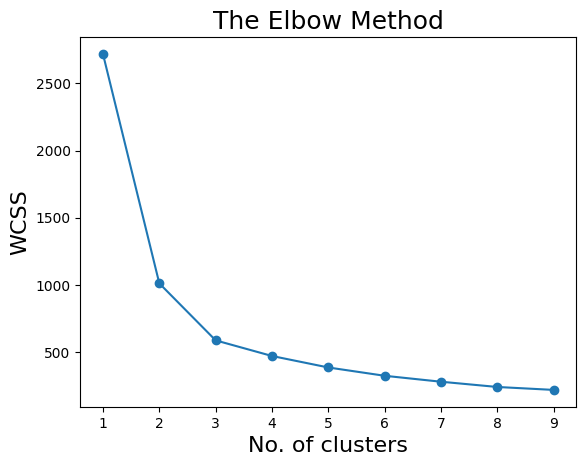

In [88]:
plt.plot(num_of_clusters,wcss, '-o')
plt.title('The Elbow Method',  fontsize = 18)
plt.xlabel('No. of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)

In [89]:
#The value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion is 3
#Thus for the given data, we conclude that the optimal number of clusters for the data is 3


In [90]:
#K-means clustering with 3 number of clustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.fit_predict(data)

kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [91]:
df = pd.DataFrame({'labels': labels, 'Grain_var': Grain_var})
ct = pd.crosstab(df['labels'], df['Grain_var'])

In [92]:
num_of_clusters = list(range(2,10))
silhouette_score_list = []

for k in num_of_clusters:
    # Create a KMeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)

    # Build the model using the data and predict the clusters
    clusters_labels = model.fit_predict(data)

    silhouette_score_list.append(silhouette_score(data,clusters_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [93]:
num_of_clusters.insert(0,1)
silhouette_score_list.insert(0,0)

Text(0, 0.5, 'Silhouette coefficient')

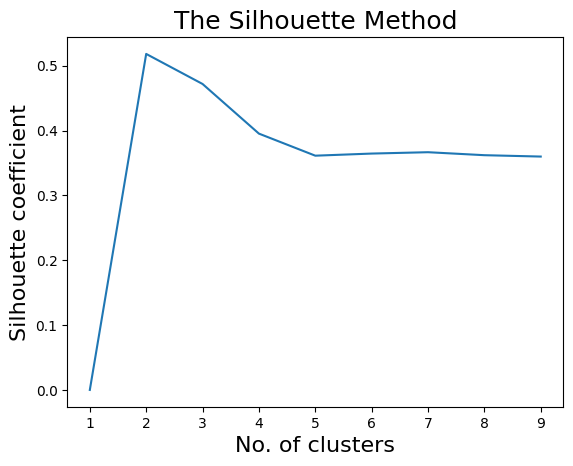

In [94]:
plt.plot(num_of_clusters,silhouette_score_list)
plt.title('The Silhouette Method',  fontsize = 18)
plt.xlabel('No. of clusters',  fontsize = 16)
plt.ylabel('Silhouette coefficient',  fontsize = 16)

In [95]:
num_of_clusters,silhouette_score_list

([1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0,
  0.5182873410849098,
  0.4719337319126887,
  0.3953600261389669,
  0.3613234083219364,
  0.36458428170684964,
  0.3666748201720589,
  0.362074429185029,
  0.3599610238402022])

In [96]:
from sklearn import metrics
# purity_score Function
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0))*100 / np.sum(contingency_matrix)

In [97]:
print("Purity score for k-means: %0.2f%% "%(purity_score(Grain_var,labels)))

Purity score for k-means: 89.52% 


In [98]:
!pip install pyclustering

In [99]:
from pyclustering.cluster.kmedoids import kmedoids

In [109]:
features=data.iloc[:,0:7]

In [110]:
initial_medoids = [1, 50, 170]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(features.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

# Prepare cluster labels
cluster_labels = np.zeros([210], dtype=int)

for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
# Mediods found in above clustering, indexes are shouwn below.
kmedoids_instance.get_medoids()

[118, 48, 162]

In [105]:
silhouette_avg = metrics.silhouette_score(data,cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.4719337319126887


In [104]:
purity = purity_score(Grain_var, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  89.52380952380952
